# Mie Performance and Jitting

**Scott Prahl**

**Apr 2021**

*If miepython is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user miepython

In [6]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import miepython.miepython as miepython_jit
    import miepython.miepython_nojit as miepython

except ModuleNotFoundError:
    print('miepython not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Size Parameters

We will use `%timeit` to see speeds for unjitted code, then jitted code

83.1 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
667 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.49 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.1 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
242 ms ± 7.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.42 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
18.4 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
55.8 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
209 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
784 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.57 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


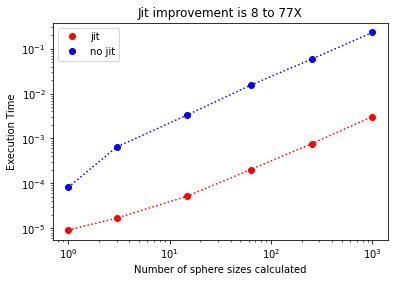

In [7]:
ntests=6

m=1.5
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython.mie(m,x)
    result[i]=a.best

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(m,x)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of sphere sizes calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Embedded spheres

In [ ]:
ntests = 6
mwater = 4/3   # rough approximation
m=1.0
mm = m/mwater
r=500                            # nm

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython.mie(mm,xx)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(mm,xx)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Testing `ez_mie`

Another high level function that should be sped up by jitting.

In [ ]:
ntests=6
m_sphere = 1.0
n_water  = 4/3
d = 1000                        # nm
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython.ez_mie(m_sphere, d, lambda0, n_water)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython_jit.ez_mie(m_sphere, d, lambda0, n_water)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Scattering Phase Function

In [ ]:
ntests = 6
m = 1.5
x = np.pi/3

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x,mu)
    result[i]=a.best

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x,mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Angles Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## And finally, as function of sphere size

In [ ]:
ntests=6
m = 1.5-0.1j
x = np.logspace(0,3,ntests)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

theta = np.linspace(-180,180)
mu = np.cos(theta/180*np.pi)

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x[i],mu)
    result[i]=a.best

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x[i],mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Sphere Size Parameter")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()